In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

print("HELLO")


HELLO


In [3]:
start = '2010-01-01'
end = '2022-10-1'

df = data.DataReader('AAPL', 'yahoo', start=start, end=end)

df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-26,153.770004,149.639999,149.660004,150.770004,93339400.0,150.770004
2022-09-27,154.720001,149.949997,152.740005,151.759995,84442700.0,151.759995
2022-09-28,150.639999,144.839996,147.639999,149.839996,146691400.0,149.839996
2022-09-29,146.720001,140.679993,146.100006,142.479996,128138200.0,142.479996
2022-09-30,143.100006,138.000000,141.279999,138.199997,124705400.0,138.199997


In [4]:
df = df.reset_index()
df = df.drop(['Adj Close'], axis=1)


In [5]:
df = df.drop(['Date'], axis=1)
df


,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3205,153.770004,149.639999,149.660004,150.770004,93339400.0
3206,154.720001,149.949997,152.740005,151.759995,84442700.0
3207,150.639999,144.839996,147.639999,149.839996,146691400.0
3208,146.720001,140.679993,146.100006,142.479996,128138200.0


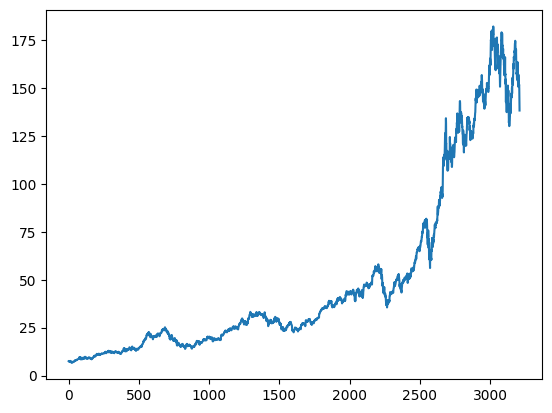

In [6]:
plt.plot(df.Close)


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3205    151.9792
3206    151.8366
3207    151.7673
3208    151.6193
3209    151.4807
Name: Close, Length: 3210, dtype: float64

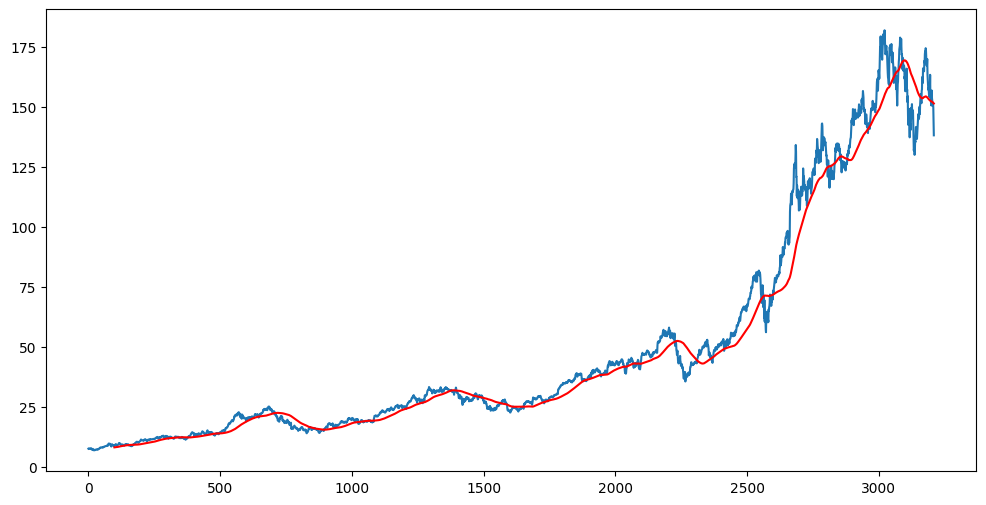

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


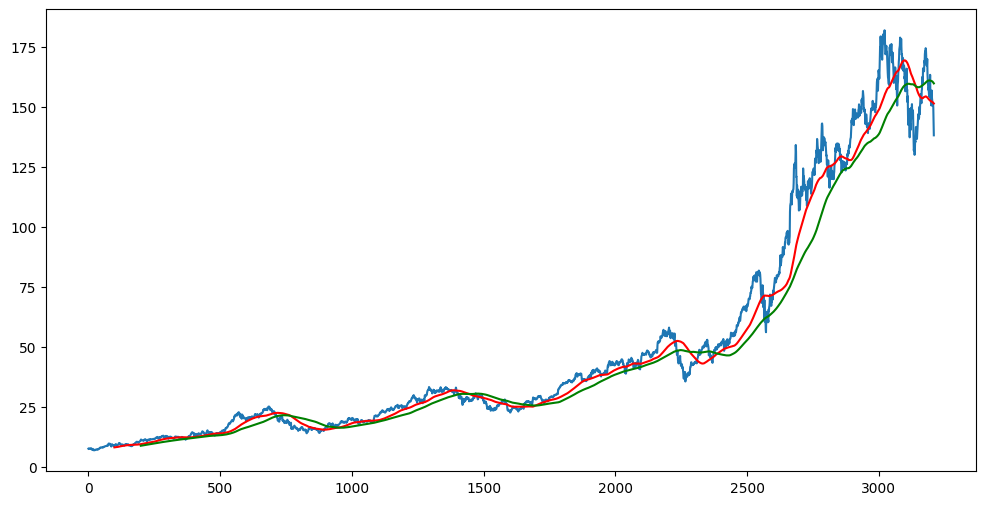

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [10]:
df.shape


(3210, 5)

In [11]:
# Spliting data into traning and testing

data_traning = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):])


print(data_traning.shape)
print(data_testing.shape)


(2247, 1)
(963, 1)


In [12]:
data_testing.head()


,Close
2247,44.172501
2248,43.680000
2249,42.122501
2250,42.400002
2251,42.157501


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [14]:
data_traning_array = scaler.fit_transform(data_traning)
data_traning_array


array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.743347  ],
       [0.73860683],
       [0.76910028]])

In [15]:
data_traning_array.shape


(2247, 1)

In [16]:
x_train = []
y_train = []

for i in range(100, data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100:i])
    y_train.append(data_traning_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [17]:
# ML Model


In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


2022-10-08 13:59:43.094584: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True,
          input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


2022-10-08 13:59:52.921987: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
68/68 [==============================] - 33s 373ms/step - loss: 0.0102
Epoch 2/50
68/68 [==============================] - 30s 435ms/step - loss: 0.0062
Epoch 3/50
68/68 [==============================] - 49s 716ms/step - loss: 0.0051
Epoch 4/50
68/68 [==============================] - 32s 465ms/step - loss: 0.0046
Epoch 5/50
68/68 [==============================] - 25s 374ms/step - loss: 0.0044
Epoch 6/50
68/68 [==============================] - 33s 479ms/step - loss: 0.0041
Epoch 7/50
68/68 [==============================] - 25s 374ms/step - loss: 0.0042
Epoch 8/50
68/68 [==============================] - 26s 376ms/step - loss: 0.0048
Epoch 9/50
68/68 [==============================] - 26s 377ms/step - loss: 0.0038
Epoch 10/50
68/68 [==============================] - 30s 444ms/step - loss: 0.0033
Epoch 11/50
68/68 [==============================] - 24s 358ms/step - loss: 0.0033
Epoch 12/50
68/68 [==============================] - 28s 401ms/step - loss: 0.0034
Epoch 13/50
6

In [ ]:
model.save('keras_model.h5')
